<a href="https://colab.research.google.com/github/hermelawesene/Plant-Disease-Classification/blob/main/Tomato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Tomato disease classification model


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantdisease


In [ ]:
import os
os.listdir('/kaggle/input/plantdisease/PlantVillage')

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [ ]:
# Root path to the dataset
base_path = "/kaggle/input/plantdisease/PlantVillage"
# List all folders
all_folders = os.listdir(base_path)
# Filter folders that are related to tomato
tomato_folders = [f for f in all_folders if f.startswith("Tomato")]

print("Tomato disease folders:")
for folder in tomato_folders:
    print(folder)

Tomato disease folders:
Tomato_Leaf_Mold
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Bacterial_spot
Tomato_Septoria_leaf_spot
Tomato_healthy
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Early_blight
Tomato__Target_Spot
Tomato_Late_blight
Tomato__Tomato_mosaic_virus


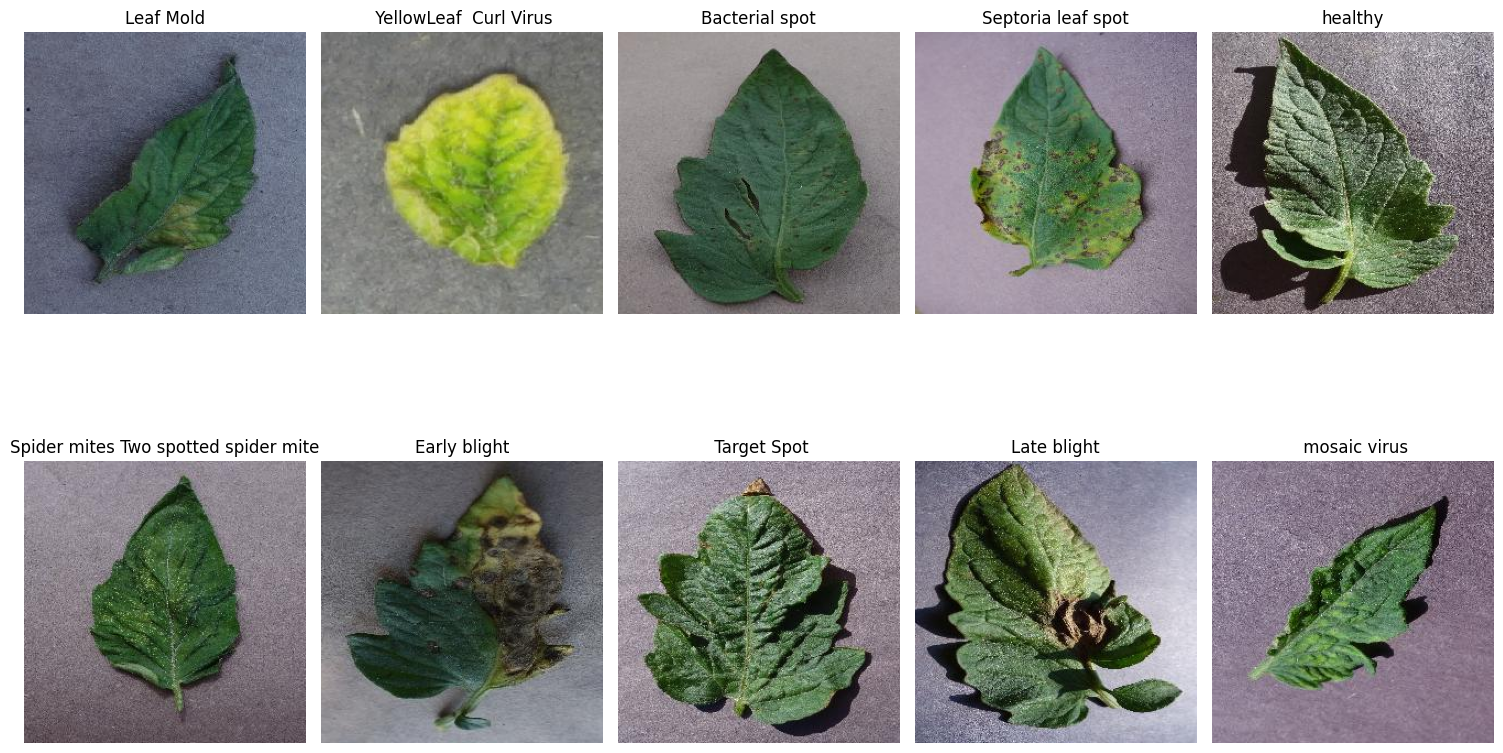

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 10))

for i, folder in enumerate(tomato_folders):
    class_path = os.path.join(base_path, folder)
    image_files = os.listdir(class_path)

    if len(image_files) == 0:
        continue

    image_path = os.path.join(class_path, image_files[0])
    image = Image.open(image_path)

    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(folder.replace("Tomato_", "").replace("_", " "))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Define constants
BATCH_SIZE = 32
IMG_SIZE = 256
CHANNELS=3
EPOCHS=30
DATA_DIR = base_path  # Confirmed Kaggle dataset path
LABELS = ['Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus']

In [ ]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,  # ✅ root folder
    validation_split=0.25,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,

    label_mode='int',
    shuffle=True,
    class_names=tomato_folders  # ✅ filter only tomato folders
)

Found 16011 files belonging to 10 classes.
Using 12009 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_path,  # root folder
    validation_split=0.25,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,

    label_mode='int',
    shuffle=False,
    class_names=tomato_folders  # ✅ include only tomato folders
)

Found 16011 files belonging to 10 classes.
Using 4002 files for validation.


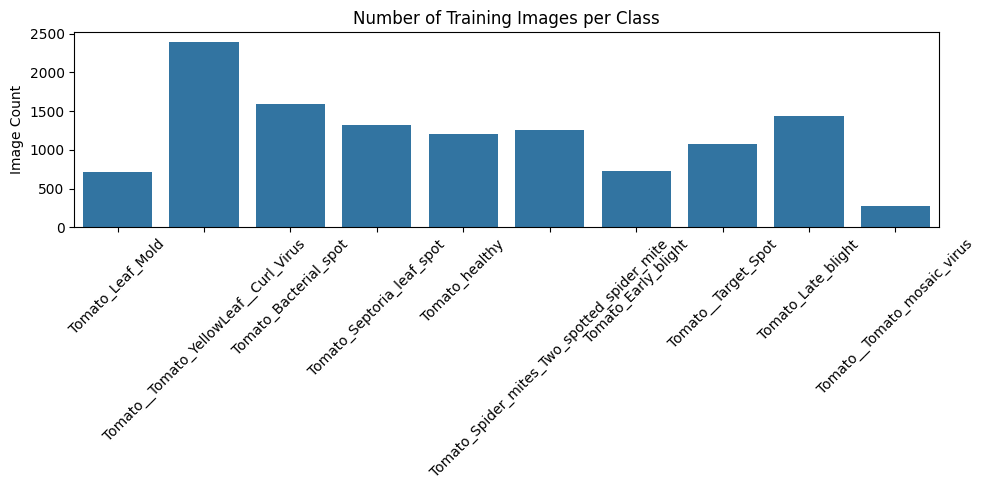

Training counts per class: {'Tomato_Leaf_Mold': np.int64(716), 'Tomato__Tomato_YellowLeaf__Curl_Virus': np.int64(2397), 'Tomato_Bacterial_spot': np.int64(1589), 'Tomato_Septoria_leaf_spot': np.int64(1321), 'Tomato_healthy': np.int64(1201), 'Tomato_Spider_mites_Two_spotted_spider_mite': np.int64(1257), 'Tomato_Early_blight': np.int64(731), 'Tomato__Target_Spot': np.int64(1071), 'Tomato_Late_blight': np.int64(1444), 'Tomato__Tomato_mosaic_virus': np.int64(282)}


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get class names
class_names = train_ds.class_names
n_classes = len(class_names)

# Count samples per class
class_counts = np.zeros(n_classes, dtype=int)

for _, label in train_ds.unbatch():
    class_counts[label.numpy()] += 1

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=class_counts)
plt.title("Number of Training Images per Class")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Training counts per class:", dict(zip(class_names, class_counts)))


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [ ]:
from tensorflow.keras import layers, models
input_shape = (IMG_SIZE, IMG_SIZE, 3) # Updated input shape to match grayscale images

modelA = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'), # Updated dense layer to match the actual number of classes

])

In [ ]:
modelA.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelA.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = modelA.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.3649 - loss: 2.4868 - val_accuracy: 0.7094 - val_loss: 0.8814
Epoch 2/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.7259 - loss: 0.7988 - val_accuracy: 0.8001 - val_loss: 0.5886
Epoch 3/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8028 - loss: 0.5627 - val_accuracy: 0.6854 - val_loss: 0.8816
Epoch 4/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.8439 - loss: 0.4763 - val_accuracy: 0.7001 - val_loss: 0.8778
Epoch 5/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.8589 - loss: 0.4087 - val_accuracy: 0.7816 - val_loss: 0.5855
Epoch 6/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8733 - loss: 0.3692 - val_accuracy: 0.9098 - val_loss: 0.2632
Epoch 7/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8966 - loss: 0.3004 - val_accuracy: 0.8156 - val_loss: 0.5170
Epoch 8/30
376/376 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.8947 - loss: 0.2916 - 

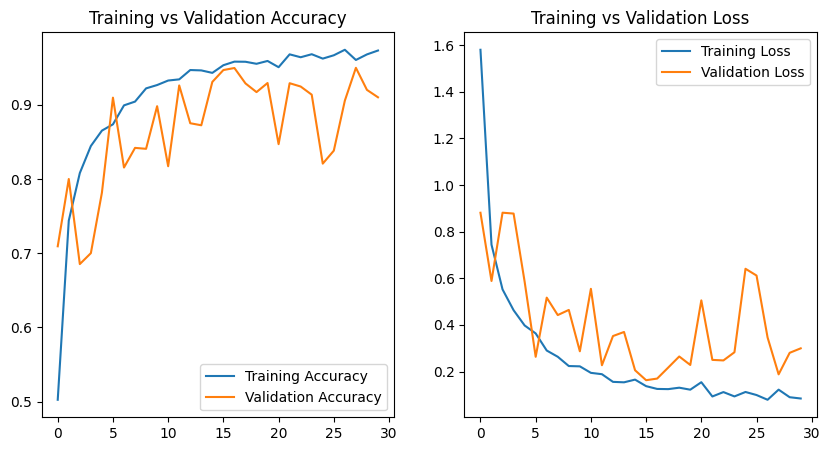

In [ ]:
# ==== VISUALIZE ACCURACY & LOSS ====
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

In [ ]:
# ✅ Optionally make test_ds from val_ds:
test_ds = val_ds.take(1)  # use just 1 batch as test (example)

First image to predict:


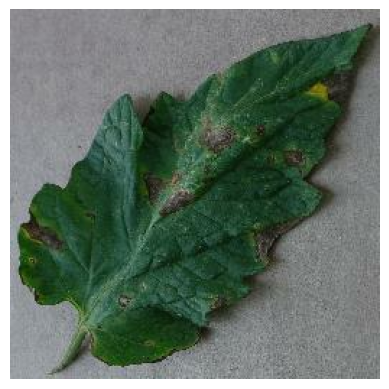

Actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 957ms/step
Predicted label: Tomato_Early_blight


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Get class names from dataset
class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else train_ds.class_names

# === STEP 1: Predict on a Single Image in Test Set ===
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")
    plt.show()

    print("Actual label:", class_names[first_label])

    batch_prediction = modelA.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_prediction[0])]
    print("Predicted label:", predicted_label)


In [ ]:
def predict(model, img, class_names):
    # Ensure input is float32 and scaled to [0,1]
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


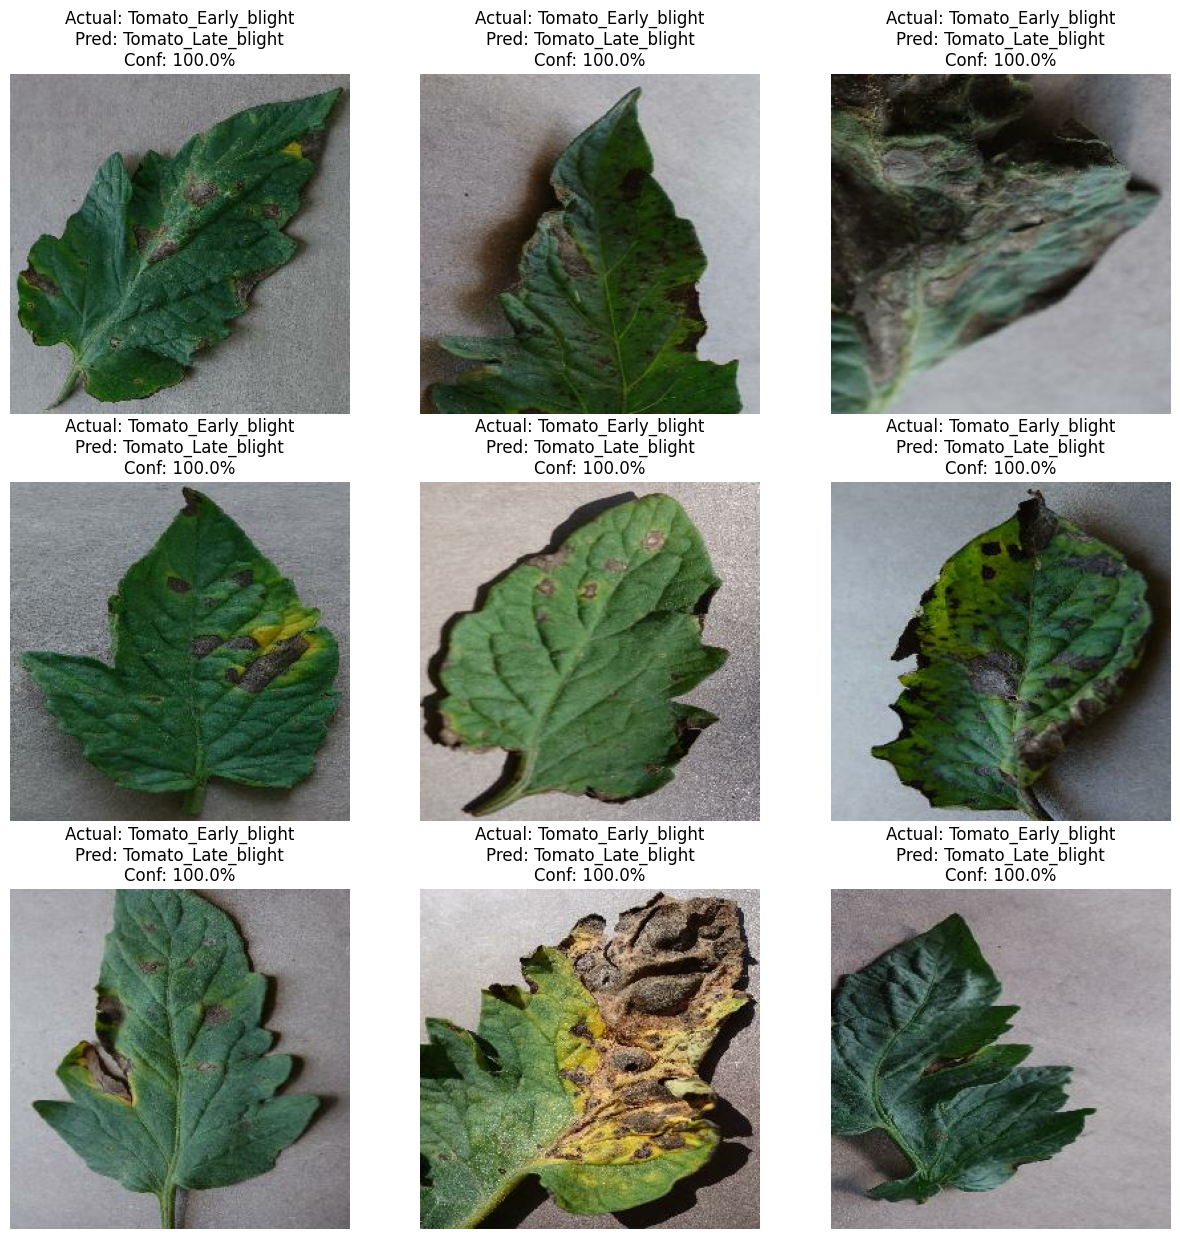

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = images[i].numpy().astype("uint8")

        predicted_class, confidence = predict(modelA, img, class_names)
        actual_class = class_names[labels[i]]

        plt.imshow(img)
        plt.title(f"Actual: {actual_class}\nPred: {predicted_class}\nConf: {confidence}%")
        plt.axis("off")


In [ ]:
# Save the model
modelA.save('tomato.keras')

# Download it (Colab only)
from google.colab import files
files.download('tomato.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#  OPTION 1: Build a Leaf vs Not-Leaf Binary Filter

In [ ]:
import kagglehub
import os
import shutil
from glob import glob
import tensorflow as tf

In [ ]:
# --- Step 1: Download Intel Scene Dataset ---
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
intel_path = path
intel_images_path = os.path.join(intel_path, "seg_train", "seg_train")

In [ ]:
# --- Step 2: Prepare Binary Dataset Folder ---
# Use a relative path to avoid root dir issues
binary_data_dir = os.path.join(os.getcwd(), "binary_leaf_classifier")
os.makedirs(os.path.join(binary_data_dir, "not_leaf"), exist_ok=True)

In [ ]:
# Copy non-leaf images
non_leaf_classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
for cls in non_leaf_classes:
    class_dir = os.path.join(intel_images_path, cls)
    images = glob(os.path.join(class_dir, "*.jpg"))
    for img_path in images[:300]:  # Limit to 300 per class
        shutil.copy(img_path, os.path.join(binary_data_dir, "not_leaf"))

In [ ]:
# --- Step 3: Copy Tomato Leaf Images ---
plant_path = "/kaggle/input/plantdisease/PlantVillage"
tomato_folders = [f for f in os.listdir(plant_path) if f.startswith("Tomato")]
os.makedirs(os.path.join(binary_data_dir, "leaf"), exist_ok=True)

for folder in tomato_folders:
    tomato_images = glob(os.path.join(plant_path, folder, "*.JPG"))[:300]
    for img_path in tomato_images:
        shutil.copy(img_path, os.path.join(binary_data_dir, "leaf"))

In [ ]:
# --- Step 4: Sanity Check ---
print("Folders in binary dataset:", os.listdir(binary_data_dir))
print("Leaf images:", len(os.listdir(os.path.join(binary_data_dir, "leaf"))))
print("Not-leaf images:", len(os.listdir(os.path.join(binary_data_dir, "not_leaf"))))

Folders in binary dataset: ['not_leaf', 'leaf']
Leaf images: 3000
Not-leaf images: 1800


In [ ]:
# --- Step 5: Create TensorFlow Dataset ---
IMG_SIZE = 224
BATCH_SIZE = 32

binary_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    binary_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


Found 4800 files belonging to 2 classes.
Using 3840 files for training.


In [ ]:
binary_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    binary_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# --- Step 6: Print Class Names ---
binary_class_names = binary_train_ds.class_names
print("Class names:", binary_class_names)

Found 4800 files belonging to 2 classes.
Using 960 files for validation.
Class names: ['leaf', 'not_leaf']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    binary_train_ds,
    validation_data=binary_val_ds,
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.8004 - loss: 0.4919 - val_accuracy: 0.9896 - val_loss: 0.0295
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9898 - loss: 0.0322 - val_accuracy: 0.9885 - val_loss: 0.0381
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9948 - val_loss: 0.0282
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9906 - loss: 0.0335 - val_accuracy: 0.9927 - val_loss: 0.0371
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9946 - loss: 0.0194 - val_accuracy: 0.9948 - val_loss: 0.0263


In [ ]:
# Save the model
model.save('leaf_filter_model.keras')

# Download it (Colab only)
from google.colab import files
files.download('leaf_filter_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load models
#leaf_filter = tf.keras.models.load_model("leaf_filter_model.h5")
#disease_model = tf.keras.models.load_model("plant_disease_model.h5")  # your existing one

# Helper: preprocess input
def preprocess_image(img_path, target_size=224):
    img = image.load_img(img_path, target_size=(target_size, target_size))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    return np.expand_dims(img_array, axis=0)

# Helper: filter + classify
def predict_pipeline(img_path):
    img = preprocess_image(img_path)

    # Step 1: Use binary classifier
    pred = model.predict(img)[0][0]
    if pred < 0.5:
        return "Not a leaf — skipping disease classification"

    # Step 2: Run disease classification
    modelA = disease_model.predict(img)
    class_idx = np.argmax(disease_pred)
    return f"Leaf detected. Predicted disease class: {class_idx}"
